# Vegi Classifier

In [1]:
from fastai.vision import *

In [3]:
path = Path('data/Food_Class')

In [4]:
path.ls()

[PosixPath('data/Food_Class/Meat'), PosixPath('data/Food_Class/Vegi')]

In [7]:
download_images(path/'Vegi/veg.txt', path/'Vegi', max_pics=200)

Error https://404store.com/2017/05/22/vegetarian-food.jpg HTTPSConnectionPool(host='404store.com', port=443): Max retries exceeded with url: /2017/05/22/vegetarian-food.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://cdn.hurrythefoodup.com/wp-content/uploads/2016/12/Vegan-Broccoli-Salad.jpg HTTPSConnectionPool(host='cdn.hurrythefoodup.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/12/Vegan-Broccoli-Salad.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fdd557aa7f0>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://404store.com/2017/05/22/vegetarian-food-fruit-and-vegetables-healthy-diet.jpg HTTPSConnectionPool(host='404store.com', port=443): Max retries exceeded with url: /2017/05/22/vegetarian-food-fruit-and-vegetables-healthy-diet.jpg (Caused by SSLError(SSLError("bad

In [8]:
download_images(path/'Meat/meat.txt', path/'Meat', max_pics=200)

In [9]:
classes = ['Vegi','Meat']

In [11]:
#remove images that can't be opened
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Vegi


Meat


In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['Meat', 'Vegi']

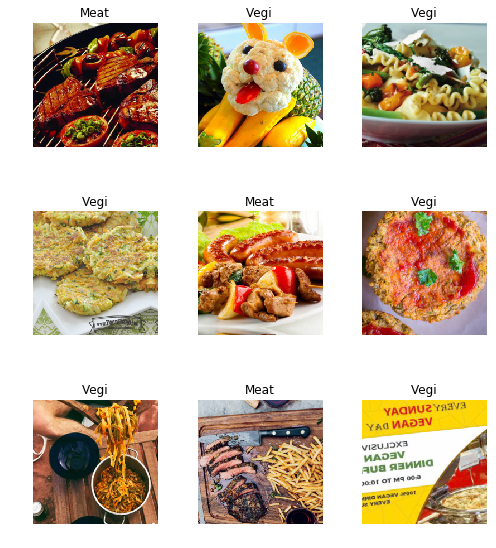

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Meat', 'Vegi'], 2, 148, 36)

# Train model

In [17]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,0.868144,0.764577,0.555556
2,0.749475,0.616059,0.722222
3,0.622846,0.376726,0.833333
4,0.527521,0.350825,0.833333


In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


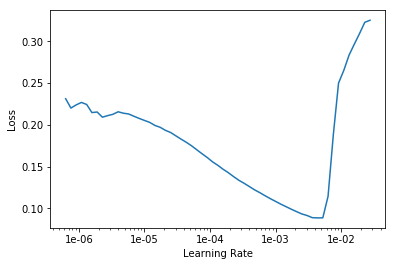

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.213011,0.327875,0.833333
2,0.178874,0.288680,0.861111
3,0.138650,0.238633,0.916667
4,0.116230,0.230454,0.916667


In [24]:
learn.save('stage-vegi-1')

# Interpretation

In [25]:
interpr = ClassificationInterpretation.from_learner(learn)

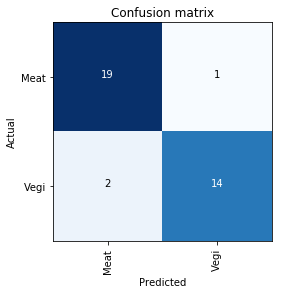

In [27]:
interpr.plot_confusion_matrix()

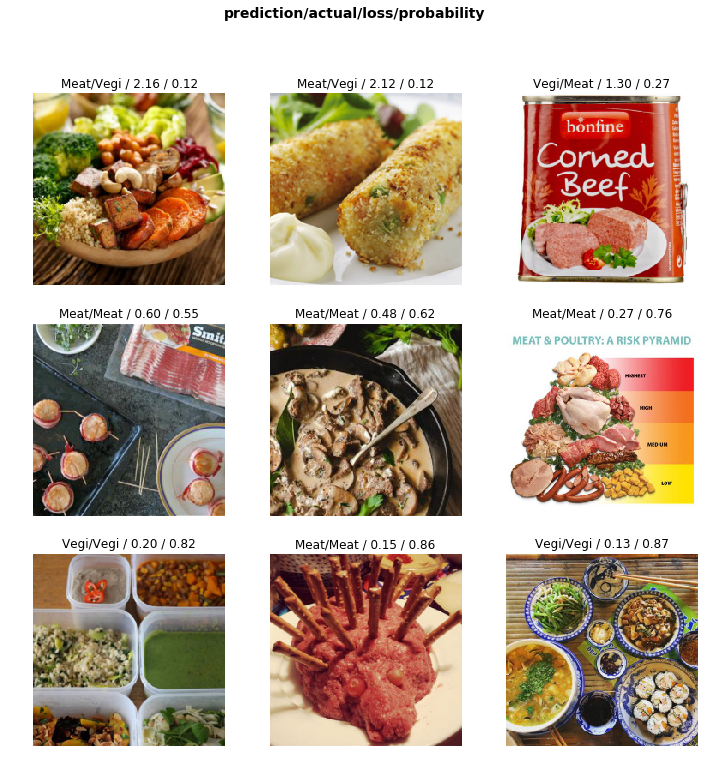

In [28]:
interpr.plot_top_losses(9)

# Cleaning Up

In [29]:
from fastai.widgets import *

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [35]:
ImageCleaner(ds, idxs, path=path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())